## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
def plot_function(results):
    color_bar = ["r", "g", "b", "y"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.8,0.85,0.9,0.95]
nesterov=[False,True]

With Momentum = 0.800
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,755,402
Trainable params: 1,755,402
Non-trainable params: 0
___________________________

50000/50000 [==============================] - 2s 37us/step - loss: 1.3260 - accuracy: 0.5326 - val_loss: 1.4156 - val_accuracy: 0.4943
Epoch 49/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.3212 - accuracy: 0.5318 - val_loss: 1.4037 - val_accuracy: 0.5033
Epoch 50/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.3126 - accuracy: 0.5353 - val_loss: 1.4142 - val_accuracy: 0.4951
With Momentum = 0.850
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
h

50000/50000 [==============================] - 2s 37us/step - loss: 1.2823 - accuracy: 0.5456 - val_loss: 1.3892 - val_accuracy: 0.5081
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.2725 - accuracy: 0.5493 - val_loss: 1.3775 - val_accuracy: 0.5100
Epoch 47/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2660 - accuracy: 0.5538 - val_loss: 1.3886 - val_accuracy: 0.5104
Epoch 48/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.2587 - accuracy: 0.5547 - val_loss: 1.4386 - val_accuracy: 0.4970
Epoch 49/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2539 - accuracy: 0.5549 - val_loss: 1.4278 - val_accuracy: 0.4932
Epoch 50/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2455 - accuracy: 0.5604 - val_loss: 1.3944 - val_accuracy: 0.5050
With Momentum = 0.900
Model: "model_1"
_________________________________________________________________
Layer (type)       

50000/50000 [==============================] - 2s 37us/step - loss: 1.1848 - accuracy: 0.5805 - val_loss: 1.3475 - val_accuracy: 0.5273
Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1707 - accuracy: 0.5838 - val_loss: 1.3528 - val_accuracy: 0.5237
Epoch 44/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1625 - accuracy: 0.5882 - val_loss: 1.3559 - val_accuracy: 0.5186
Epoch 45/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1583 - accuracy: 0.5892 - val_loss: 1.3906 - val_accuracy: 0.5098
Epoch 46/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1554 - accuracy: 0.5898 - val_loss: 1.3834 - val_accuracy: 0.5150
Epoch 47/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1400 - accuracy: 0.5969 - val_loss: 1.3714 - val_accuracy: 0.5171
Epoch 48/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1292 - accuracy: 0.5983 - val_loss: 1.3532

50000/50000 [==============================] - 2s 37us/step - loss: 1.0263 - accuracy: 0.6340 - val_loss: 1.3432 - val_accuracy: 0.5326
Epoch 40/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.0194 - accuracy: 0.6379 - val_loss: 1.3319 - val_accuracy: 0.5299
Epoch 41/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.0050 - accuracy: 0.6430 - val_loss: 1.3305 - val_accuracy: 0.5384
Epoch 42/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9781 - accuracy: 0.6534 - val_loss: 1.4144 - val_accuracy: 0.5195
Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9847 - accuracy: 0.6498 - val_loss: 1.4101 - val_accuracy: 0.5201
Epoch 44/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9601 - accuracy: 0.6604 - val_loss: 1.4252 - val_accuracy: 0.5194
Epoch 45/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9530 - accuracy: 0.6627 - val_loss: 1.4235

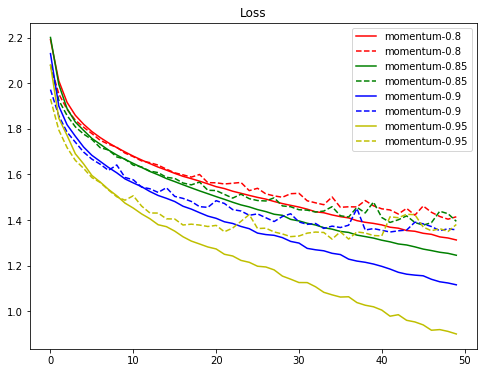

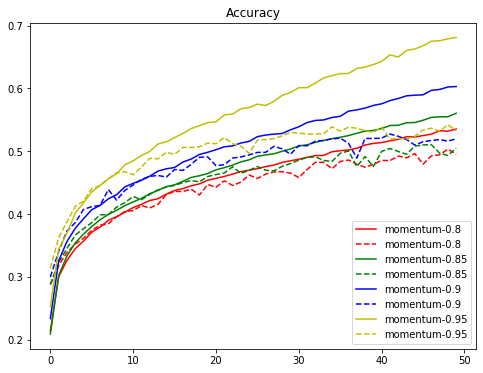

With Momentum = 0.800
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,755,402
Trainable params: 1,755,402
Non-trainable params: 0
___________________________

50000/50000 [==============================] - 2s 38us/step - loss: 1.3129 - accuracy: 0.5387 - val_loss: 1.4372 - val_accuracy: 0.4894
Epoch 49/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3098 - accuracy: 0.5386 - val_loss: 1.4057 - val_accuracy: 0.4980
Epoch 50/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3004 - accuracy: 0.5434 - val_loss: 1.5204 - val_accuracy: 0.4692
With Momentum = 0.850
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
h

50000/50000 [==============================] - 2s 39us/step - loss: 1.2636 - accuracy: 0.5544 - val_loss: 1.3960 - val_accuracy: 0.4989
Epoch 46/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2521 - accuracy: 0.5560 - val_loss: 1.4450 - val_accuracy: 0.4907
Epoch 47/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2467 - accuracy: 0.5603 - val_loss: 1.4533 - val_accuracy: 0.4841
Epoch 48/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2392 - accuracy: 0.5623 - val_loss: 1.3661 - val_accuracy: 0.5174
Epoch 49/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2304 - accuracy: 0.5665 - val_loss: 1.3788 - val_accuracy: 0.5092
Epoch 50/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2248 - accuracy: 0.5674 - val_loss: 1.4141 - val_accuracy: 0.5010
With Momentum = 0.900
Model: "model_1"
_________________________________________________________________
Layer (type)       

50000/50000 [==============================] - 2s 38us/step - loss: 1.1545 - accuracy: 0.5899 - val_loss: 1.3592 - val_accuracy: 0.5194
Epoch 43/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1443 - accuracy: 0.5940 - val_loss: 1.3876 - val_accuracy: 0.5191
Epoch 44/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.1389 - accuracy: 0.5967 - val_loss: 1.3668 - val_accuracy: 0.5202
Epoch 45/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1220 - accuracy: 0.6028 - val_loss: 1.5544 - val_accuracy: 0.4812
Epoch 46/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1125 - accuracy: 0.6060 - val_loss: 1.4976 - val_accuracy: 0.4876
Epoch 47/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1076 - accuracy: 0.6089 - val_loss: 1.3696 - val_accuracy: 0.5189
Epoch 48/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.0912 - accuracy: 0.6139 - val_loss: 1.3922

50000/50000 [==============================] - 2s 38us/step - loss: 0.9434 - accuracy: 0.6655 - val_loss: 1.4033 - val_accuracy: 0.5227
Epoch 40/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.9316 - accuracy: 0.6696 - val_loss: 1.4608 - val_accuracy: 0.5117
Epoch 41/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.9184 - accuracy: 0.6748 - val_loss: 1.3663 - val_accuracy: 0.5304
Epoch 42/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.9030 - accuracy: 0.6792 - val_loss: 1.4186 - val_accuracy: 0.5247
Epoch 43/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.8885 - accuracy: 0.6846 - val_loss: 1.4387 - val_accuracy: 0.5170
Epoch 44/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.8751 - accuracy: 0.6885 - val_loss: 1.3979 - val_accuracy: 0.5322
Epoch 45/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.8533 - accuracy: 0.6988 - val_loss: 1.5479

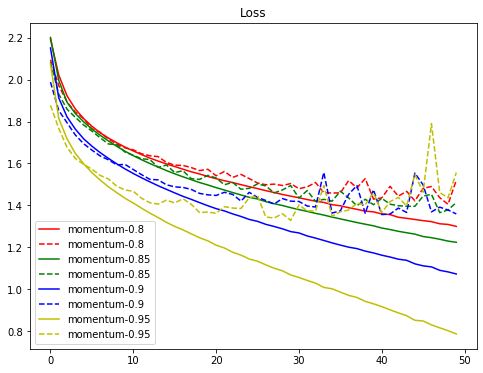

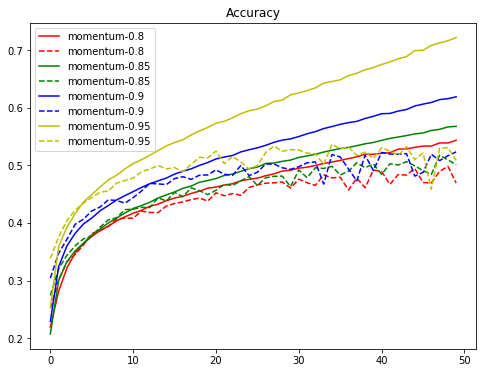

In [8]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for nes in nesterov: 
    results = {}
    for mo in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉 #The new one can start at Dense, not Dense2
        print("With Momentum = %.3f" % (mo))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nes, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        # Record 此次 model 的結果 in dictionary
        momentum_tag = "momentum-%s" % str(mo) 
        results[momentum_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    print("LearningRate= ",LEARNING_RATE)
    print("With Nesterov = ",nes)
    plot_function(results) 
